In [1]:
import torch
from torch.nn import functional as f

import matplotlib.pyplot as plt
import numpy as np

from time import perf_counter
np.set_printoptions(precision=2)

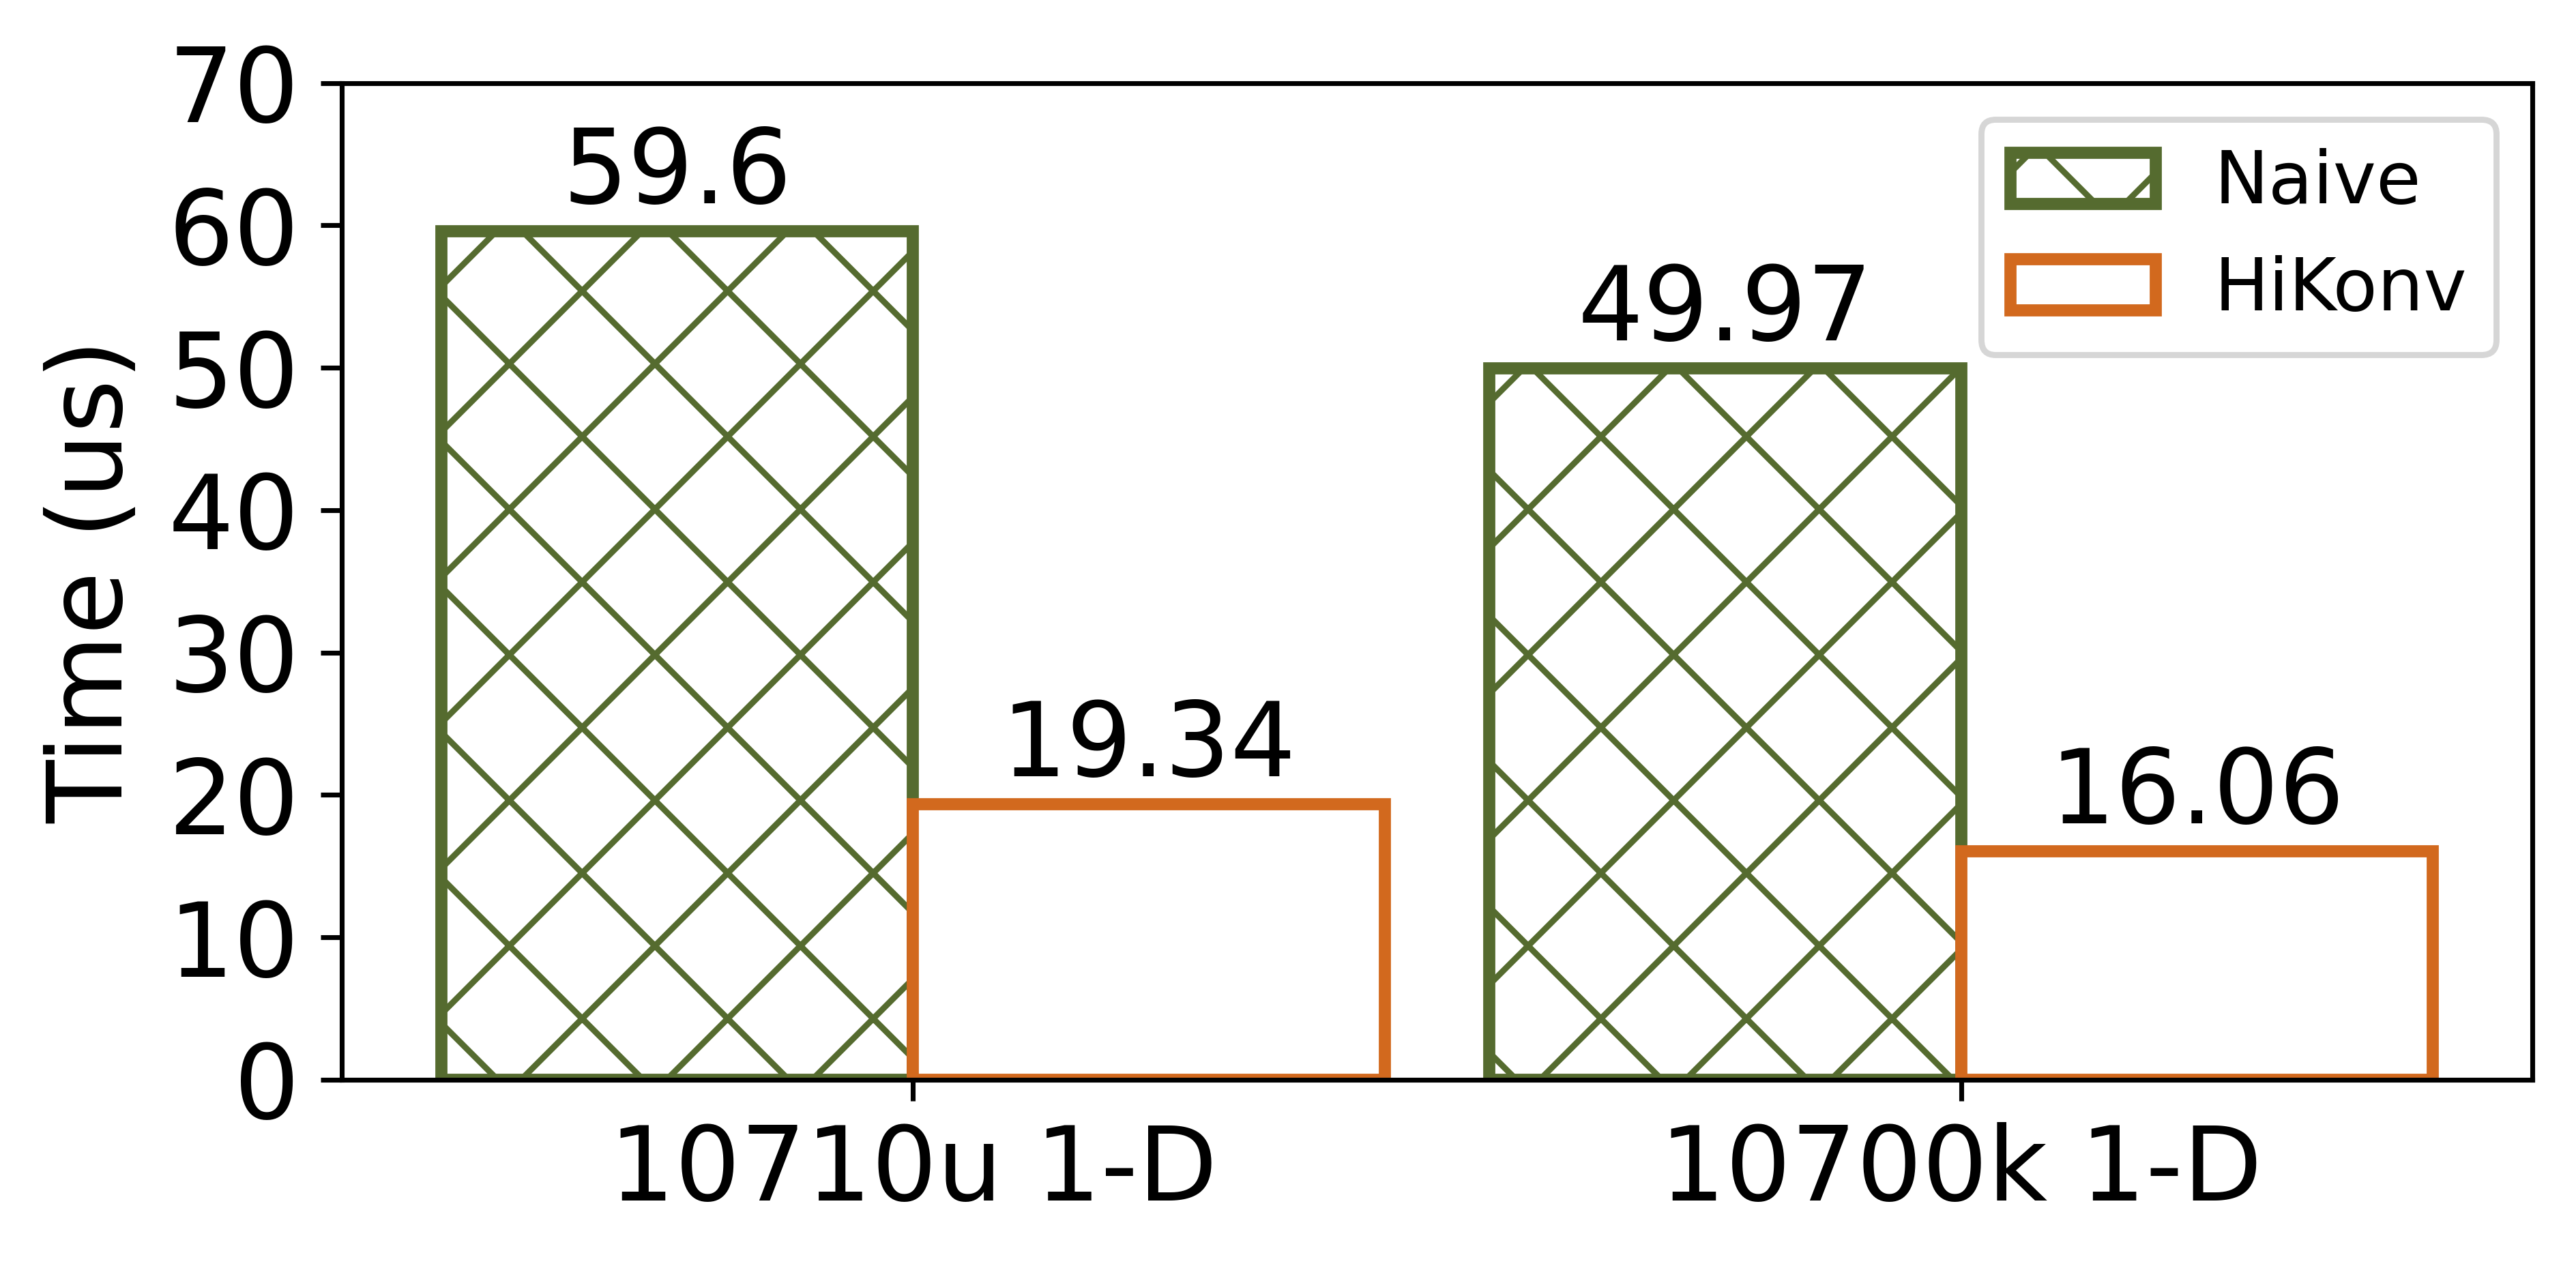

In [2]:
labels = ['10710u 1-D', '10700k 1-D']

y_1d_naive = np.array([59606, 49979])
y_1d_split = np.array([19341, 16060])

y_2d_naive = np.array([19294198, 16223212])
y_2d_split = np.array([6101866, 5124203])

x = np.arange(len(labels))  # the label locations
width = 0.45  # the width of the bars

fig, ax = plt.subplots(figsize=(6, 3), dpi=640)
rects1 = ax.bar(x - width/2, y_1d_naive//10/100, width, edgecolor='darkolivegreen', color='w', hatch = 'x', linewidth=2, label='Naive')
rects2 = ax.bar(x + width/2, y_1d_split//10/100, width, edgecolor='chocolate', color='w', hatch = '', linewidth=2, label='HiKonv')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Time (us)', fontsize=17)
# ax.set_title('1-D Convolution')
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=17)
plt.yticks(fontsize=17)
ax.set_ylim([0, 70])
ax.legend(fontsize=12)

ax.bar_label(rects1, padding=1, fontsize=17)
ax.bar_label(rects2, padding=1, fontsize=17)

fig.tight_layout()

plt.show()

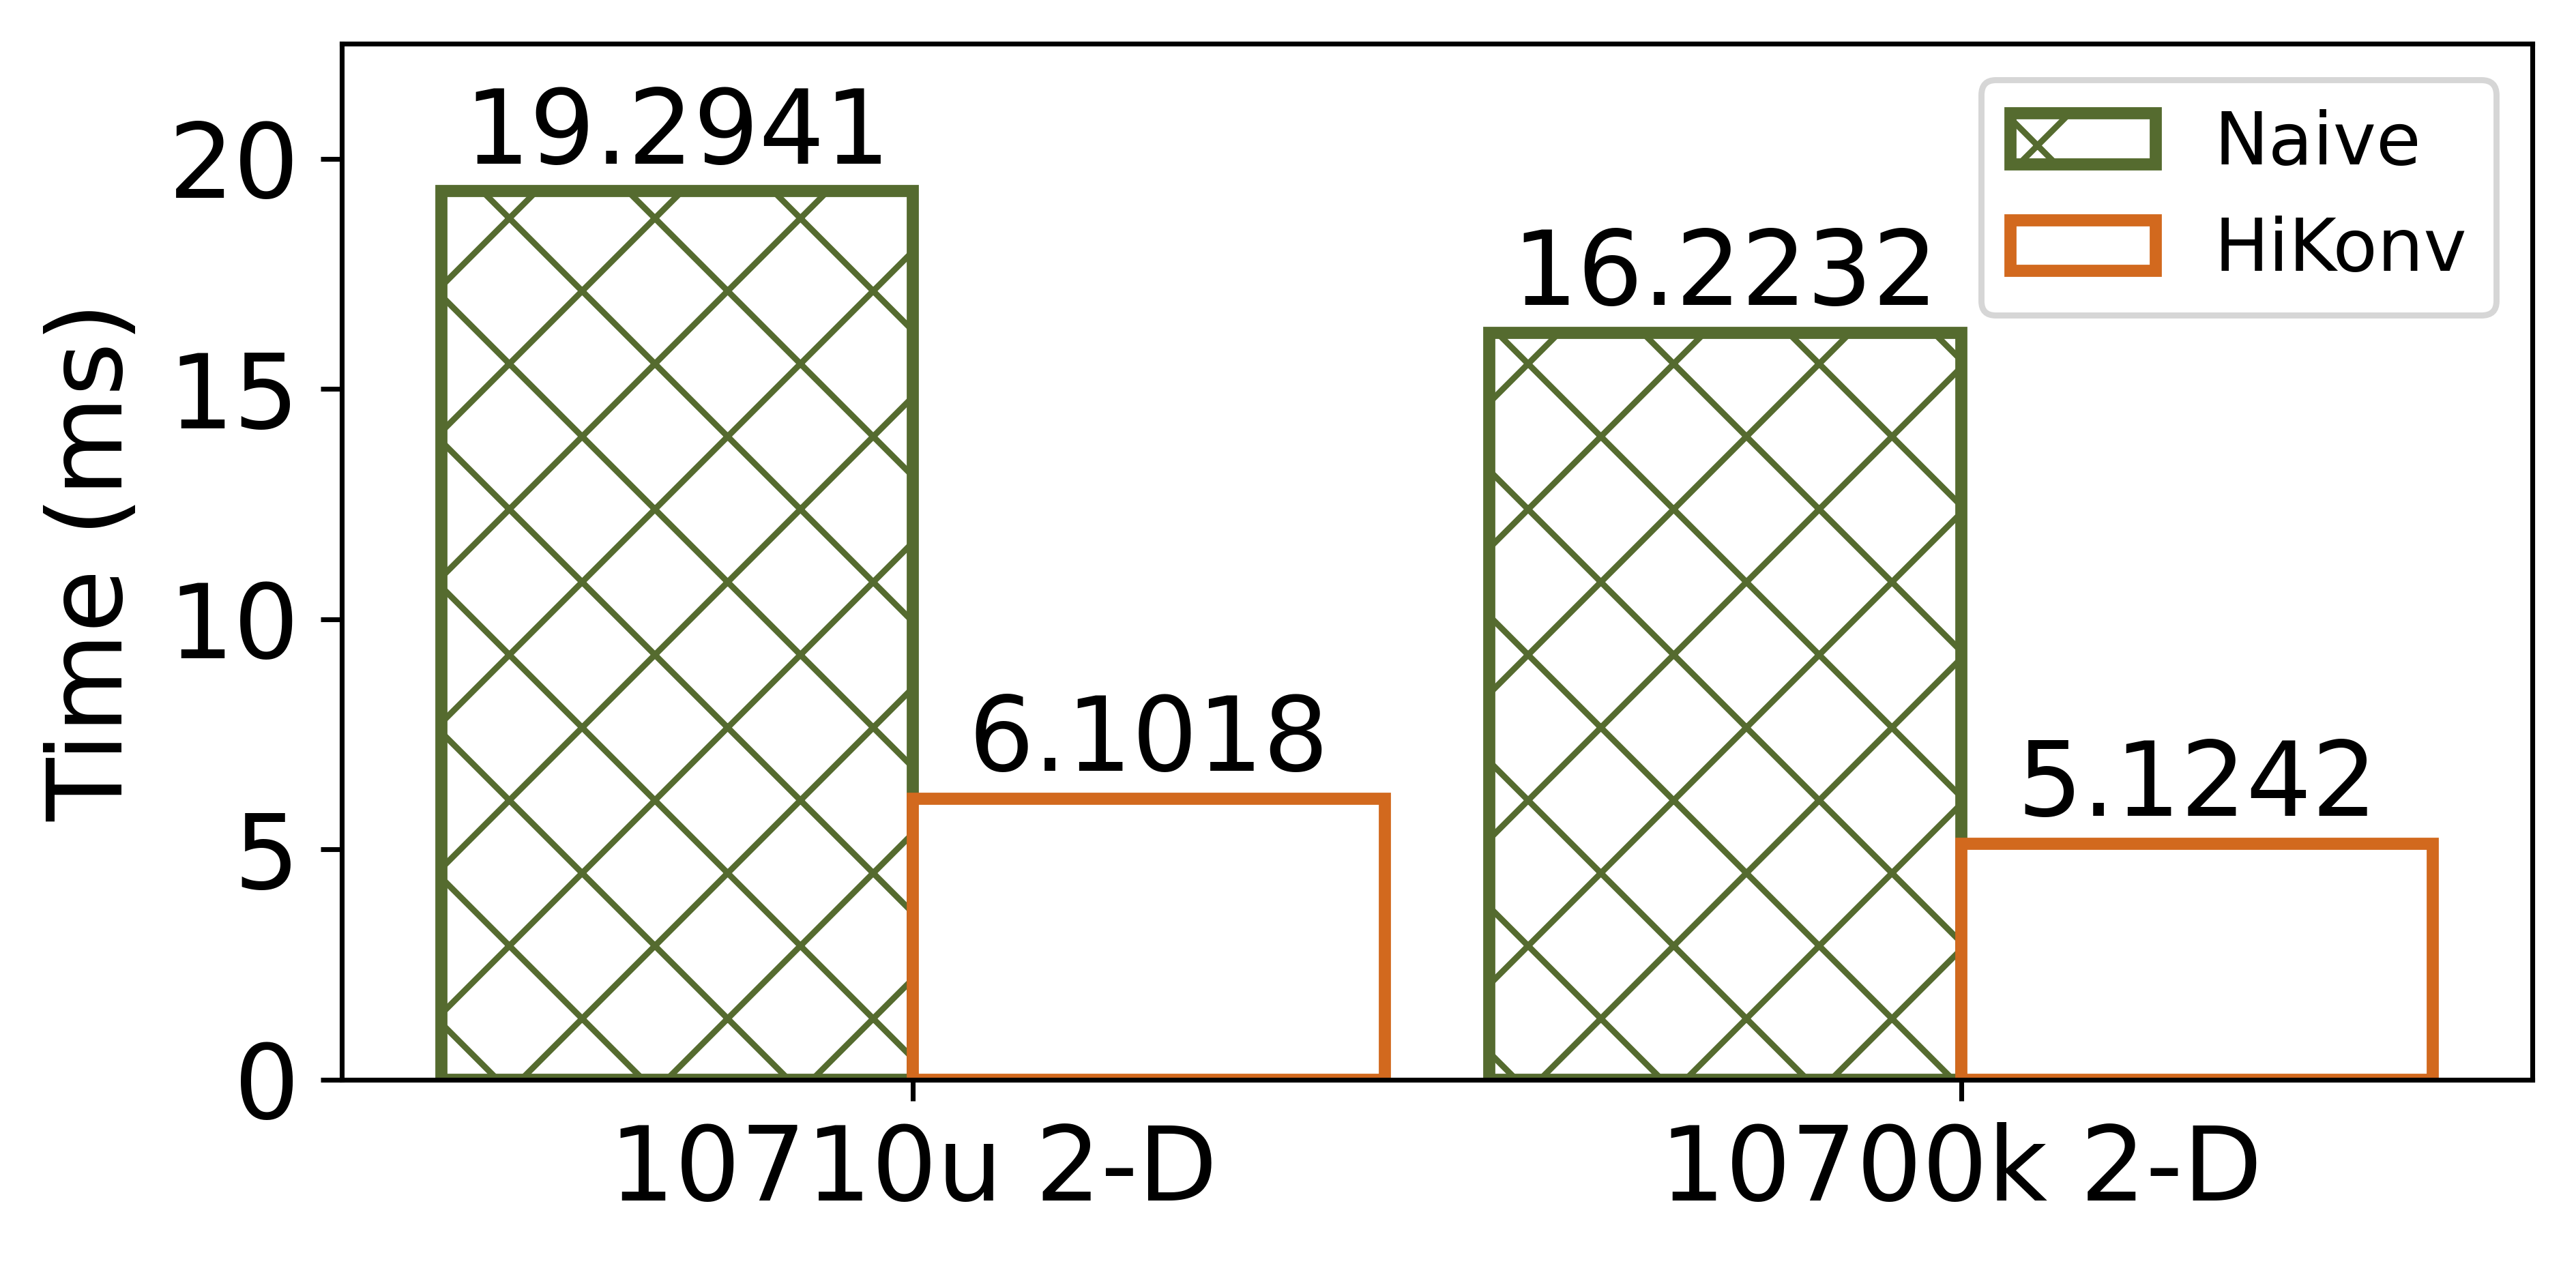

In [3]:
fig, ax = plt.subplots(figsize=(6, 3), dpi=640)
labels = ['10710u 2-D', '10700k 2-D']

rects1 = ax.bar(x - width/2, y_2d_naive//100/10000, width, edgecolor='darkolivegreen', color='w', hatch = 'x', linewidth=2, label='Naive')
rects2 = ax.bar(x + width/2, y_2d_split//100/10000, width, edgecolor='chocolate', color='w', hatch = '', linewidth=2, label='HiKonv')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Time (ms)', fontsize=17)
# ax.set_title('2-D Convolution')
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=17)
plt.yticks(fontsize=17)
ax.set_ylim([0, 22.5])
ax.legend(fontsize=12)

ax.bar_label(rects1, padding=1, fontsize=17)
ax.bar_label(rects2, padding=1, fontsize=17)

fig.tight_layout()

plt.show()

[1.98 1.99 2.01 3.15 3.24 4.23 5.69 8.47]


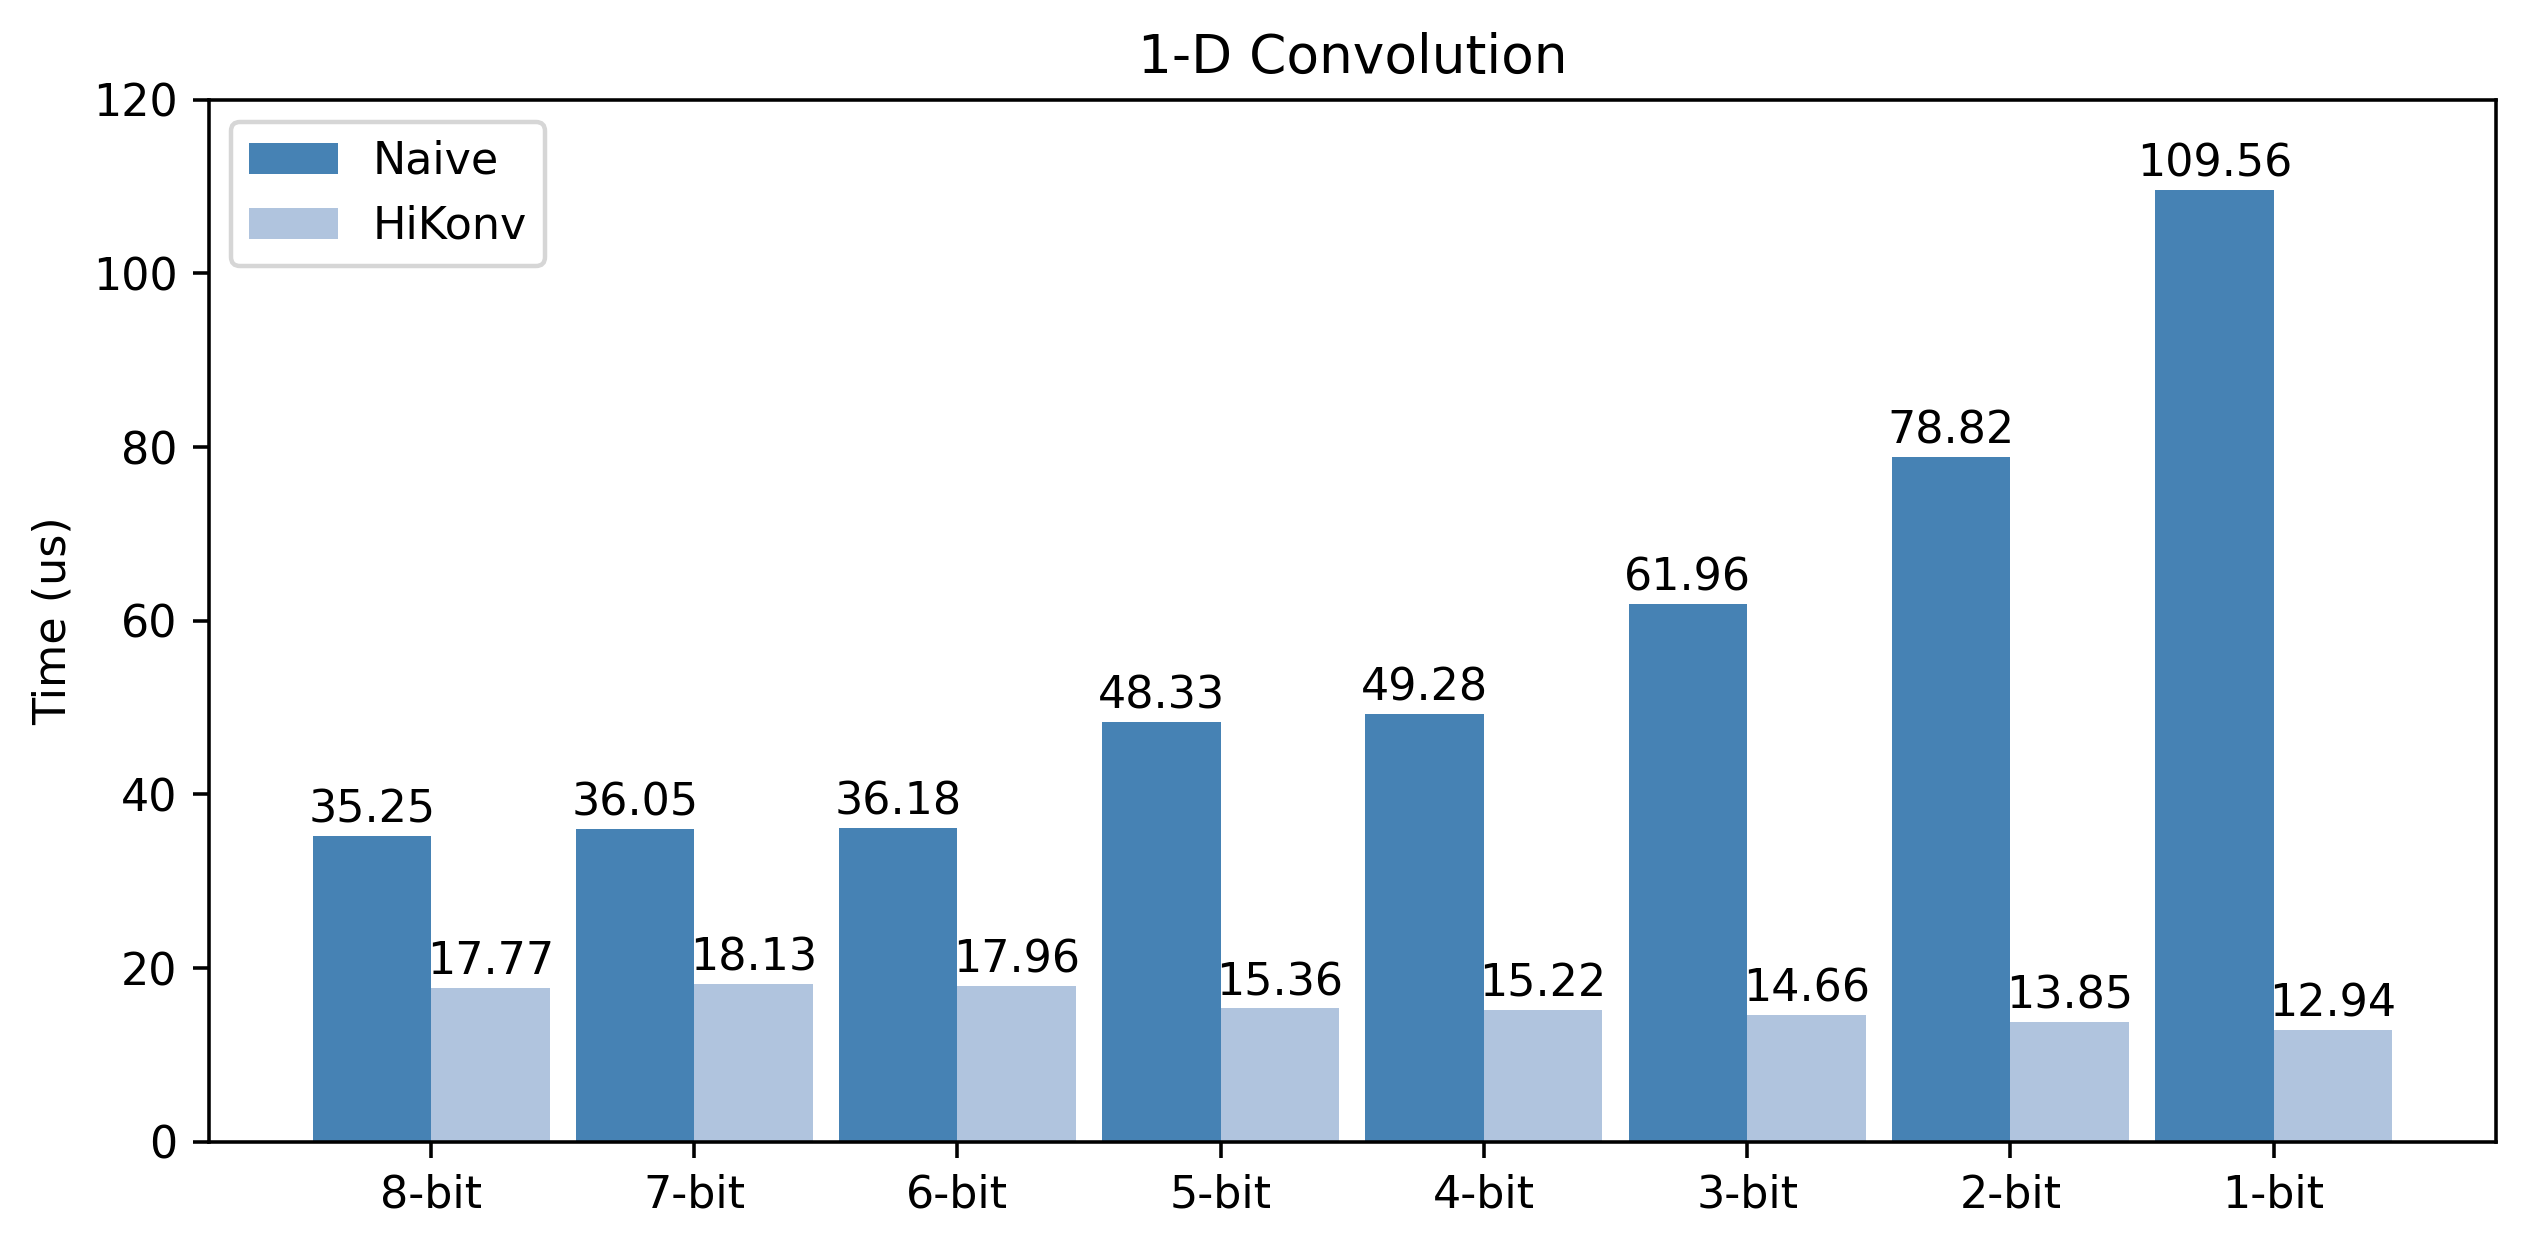

In [4]:
labels = ['8-bit', '7-bit', '6-bit', '5-bit', '4-bit', '3-bit', '2-bit', '1-bit']

y_1d_naive = np.array([35252, 36058, 36187, 48334, 49285, 61967, 78827, 109567])
y_1d_split = np.array([17774, 18136, 17964, 15362, 15226, 14662, 13855, 12940])


y_1d_speed = y_1d_naive/y_1d_split
print(y_1d_speed)

x = np.arange(len(labels))  # the label locations
width = 0.45  # the width of the bars

fig, ax = plt.subplots(figsize=(8, 4), dpi=320)
rects1 = ax.bar(x - width/2, y_1d_naive//10/100, width, color="steelblue", label='Naive')
rects2 = ax.bar(x + width/2, y_1d_split//10/100, width, color="lightsteelblue", label='HiKonv')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Time (us)')
ax.set_title('1-D Convolution')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylim([0, 120])
ax.legend()

ax.bar_label(rects1, padding=1)
ax.bar_label(rects2, padding=1)

fig.tight_layout()

plt.show()

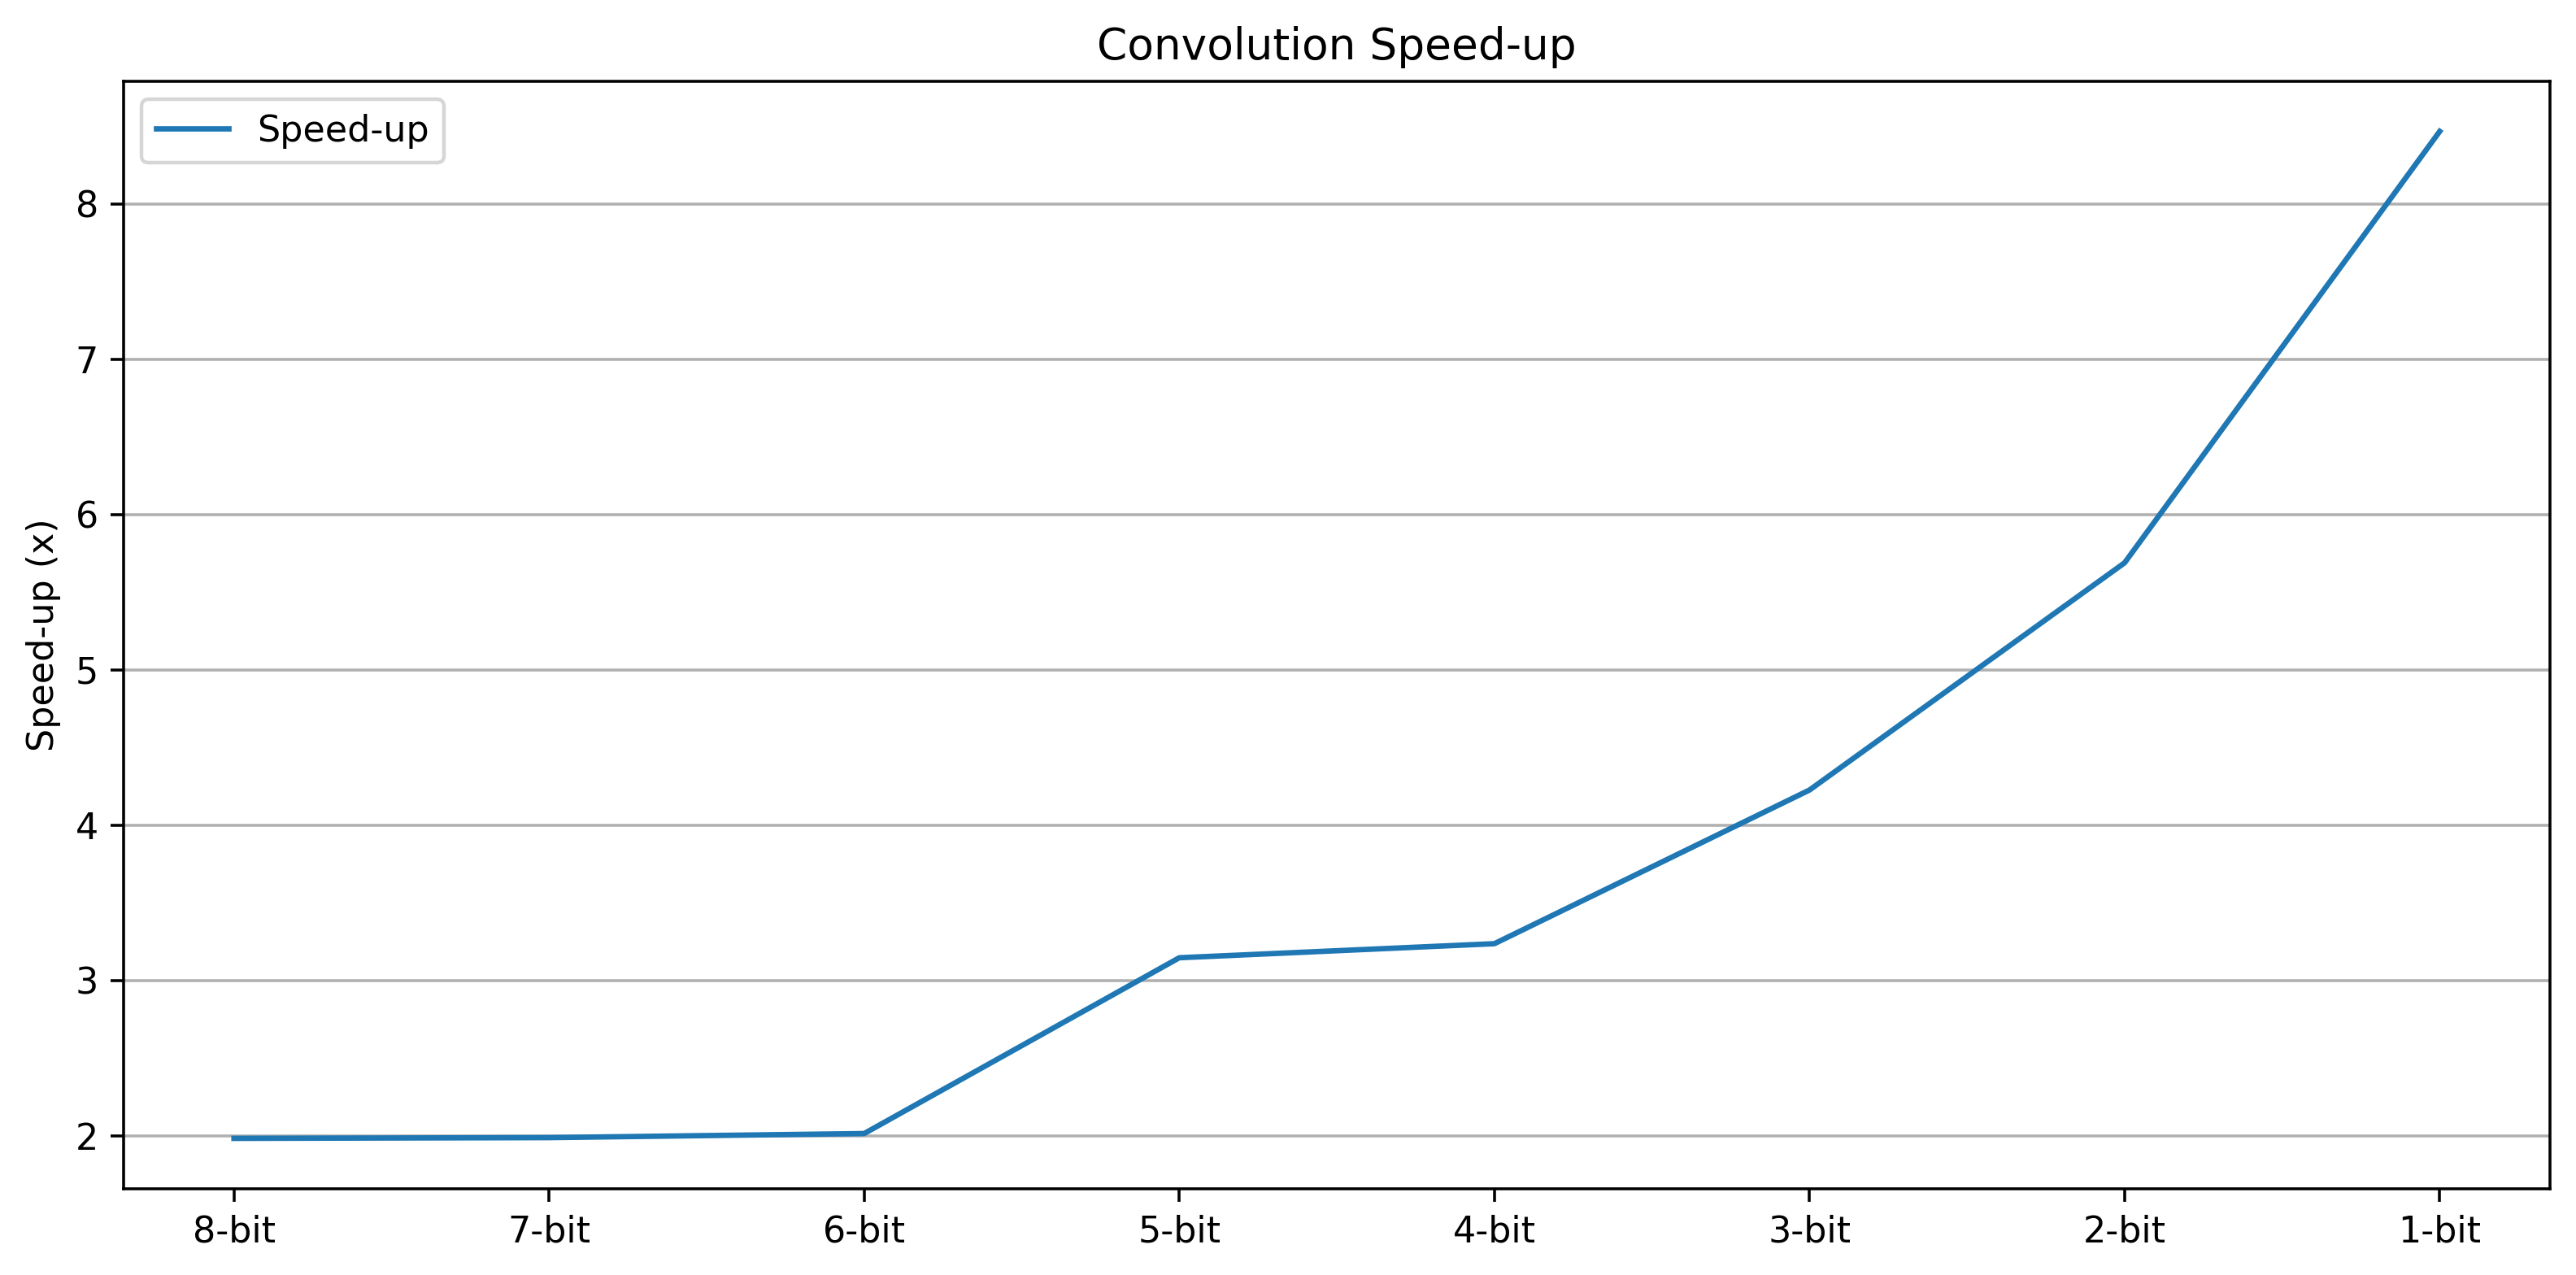

In [5]:
fig, ax = plt.subplots(figsize=(10, 5), dpi=320)

rects1 = ax.plot(x, y_1d_speed, label='Speed-up')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Speed-up (x)')
ax.set_title('Convolution Speed-up')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
ax.yaxis.grid(True)

fig.tight_layout()

plt.show()

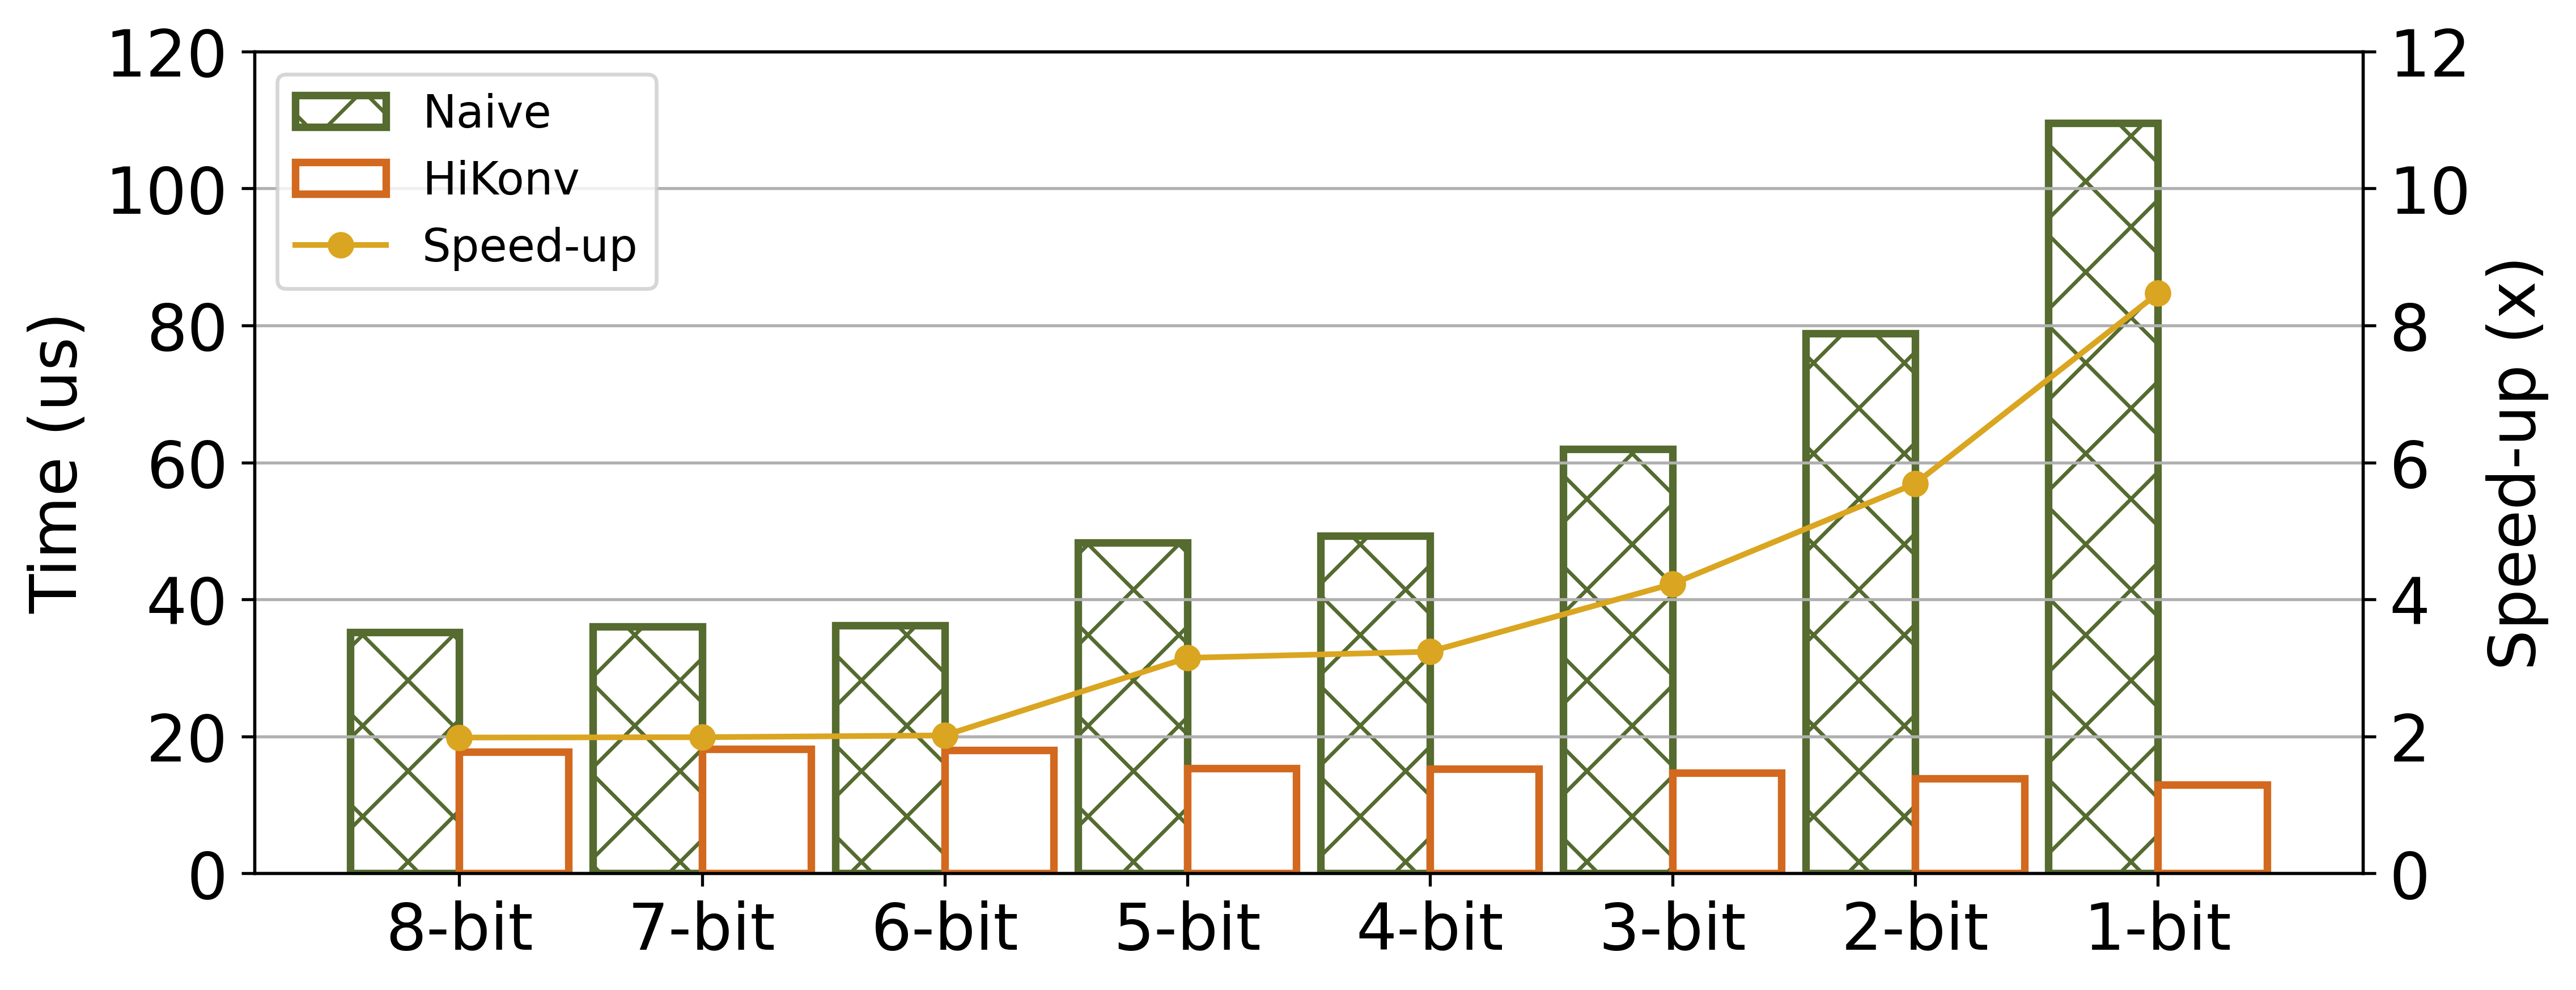

In [6]:
fig, ax = plt.subplots(figsize=(10, 4), dpi=480)

twin1 = ax.twinx()

p1 = ax.bar(x - width/2, y_1d_naive//10/100, width, edgecolor='darkolivegreen', color='w', hatch = 'x', linewidth=2, label='Naive')
p2 = ax.bar(x + width/2, y_1d_split//10/100, width, edgecolor='chocolate', color='w', hatch = '', linewidth=2, label='HiKonv')
p3, = twin1.plot(x, y_1d_speed, "o-", color="goldenrod", label='Speed-up', zorder=20)
ax.set_ylabel('Time (us)', fontsize=17)
# ax.set_title('1-D Convolution')
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=17)
ax.set_ylim([0, 120])

# ax.bar_label(p1, padding=2, zorder=20)
# ax.bar_label(p2, padding=2, zorder=20)

twin1.set_ylabel('Speed-up (x)', fontsize=17)
# twin1.set_title('Convolution Speed-up')
twin1.set_xticks(x)
twin1.set_xticklabels(labels, fontsize=17)
twin1.set_ylim([0, 12])
ax.yaxis.grid(True)

ax.legend(handles=[p1, p2, p3], fontsize=12)
plt.setp(ax.get_yticklabels(), fontsize=17)
plt.yticks(fontsize=17)
plt.show()